# Custom Models and Training w/ TensorFlow:

* `tensorflow`'s low level Python API will be useful when you need extra control to write custom loss functions, custom metrics, layers, models, initializers, regularizers, weight constraints, and more.

# A. TensorFlow:

* **What does TensorFlow offer?**
    * Its core is very similar to NumPy, but with GPU support.
    * It supports distributed computing (across multiple devices and servers).
    * It includes a kind of just-in-time (JIT) compiler that allows it to optimize computations for speed and memory usage. It works by extracting the computation graph from a Python function, optimizing it (e.g., by pruning unused nodes), and running it efficiently (e.g., by automatically running independent operations in parallel).
    * Computation graphs can be exported to a portable format, so you can train a TensorFlow model in one environment (e.g., using Python on Linux) and run it in another (e.g., using Java on an Android device).
    * It implements reverse-mode autodiff and provides some excellent optimizers, such as RMSProp and Nadam , so you can easily minimize all sorts of loss functions.<br><br>

* At the lowest level, each TensorFlow operation (op for short) is implemented using highly efficient C++ code:
    * Many operations have multiple implementations called kernels: each kernel is dedicated to a specific device type, such as CPUs, GPUs, or even TPUs (tensor processing units).
    * GPUs can dramatically speed up computations by splitting them into many smaller chunks and running them in parallel across many GPU threads.
    * TPUs are even faster: they are custom ASIC chips built specifically for deep learning operations.<br><br>

* **Overview of TensorFlow's Python API:<br>**
    &emsp; 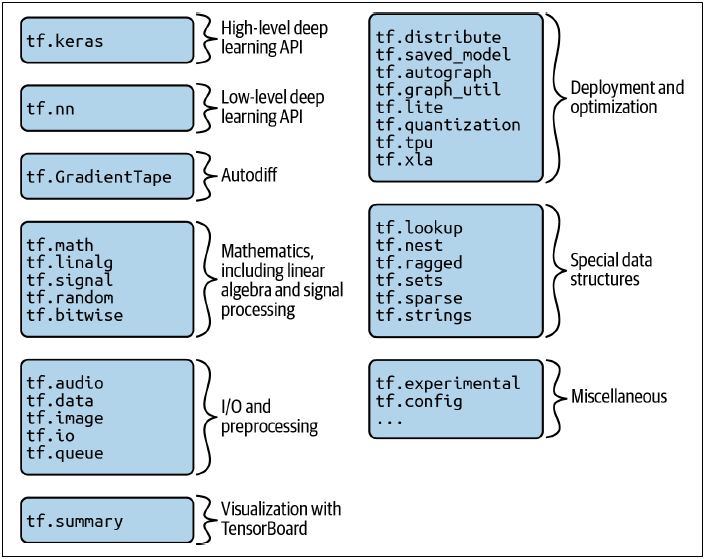 <br><br>

* **TensorFlow Architecture: <br>**
    &emsp; 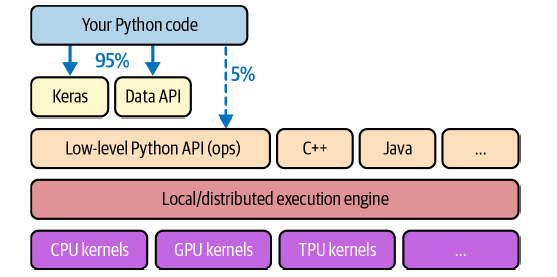 <br><br>


# B. Using TensorFlow like NumPy:

### B.1 Tensors and Operations:

* You can create a tensor w/ `tf.constant()`
* `tf.Tensor` has a shape and a data type.
* Indexing works much like in NumPy.
* A tensor can also hold a scalar value.

In [1]:
import tensorflow as tf

In [2]:
t = tf.constant(
    [
        [1., 2., 3.],
        [4., 5., 6.]
    ]
)

In [3]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [4]:
t.shape

TensorShape([2, 3])

In [5]:
t.dtype

tf.float32

In [6]:
#indexing 
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [7]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [8]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [9]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [10]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [11]:
tf.matmul(t, t, transpose_b=True)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [12]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

### B.2.Tensors and Numpy:

* You can create a tensor from a NumPy array, and vice versa.
* You can apply TensorFlow operations to NumPy arrays and NumPy operations to tensors.
* NumPy uses 64-bit precision by default, while Tensor‐Flow uses 32-bit. This is because 32-bit precision is generally more than enough for neural networks, plus it runs faster and uses less RAM. So when you create a tensor from a NumPy array, make sure to set `dtype=tf.float32`.

In [13]:
import numpy as np

In [14]:
a = np.array([2., 4., 5.])

In [15]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [16]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### B.3. Type Conversions:

* Type conversions can significantly hurt performance, and they can easily go unnoticed when they are done automatically:
    * To avoid this, TensorFlow does not perform any type conversions automatically: it just raises an exception if you try to execute an operation on tensors with incompatible types.
    * For example, you cannot add a float tensor and an integer tensor, and you cannot even add a 32-bit float and a 64-bit float.
    * Use `tf.cast()` when converting types

In [19]:
try:
    tf.constant(2.0) + tf.constant(40)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [20]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### B.4. Variables:

* `tf.Tensor` values from `tf.constant` are immutable (cannot be modified). This means that regular tensors cannot be used to implement weights in a neural network, since they need to be tweaked by backpropagation. Plus, other parameters may also need to change over time (e.g., a momentum optimizer keeps track of past gradients).

* `tf.Variable`:
    * Acts much like a `tf.Tensor` : you can perform the same operations w/ it, plays nicely w/ NumPy, and is just picky w/ types.
    * But it can also be modified in place using the `assign()` method (or `assign_add()` or `assign_sub()`, w/c increment or decrement the variable by the given value).
    * You can also modify individual cells (or slices), by using the cell's (or slice's) `assign()` method or by using the `scatter_update()` or `scatter_nd_update()` methods.
    * Direct assignment will not work
    * In practice you will rarely have to create variables manually; Keras provides an `add_weight()` method that will take care of it for you. Model parameters will generally be updated directly by the optimizers, so you will rarely need to update variables manually.

In [21]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [22]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [23]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [24]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [26]:
v.scatter_nd_update(
    indices=[[0,0], [1, 2]],
    updates=[100, 200.]
)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

In [27]:
#v[1] = [7., 8., 9.]

### B.5. Strings:

In [28]:
tf.constant(b"Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [29]:
tf.constant("Hello World")

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello World'>

In [30]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [31]:
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

In [32]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [33]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [34]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233])>

### B.6. Other Data Structures:

* **TensorFlow supports several other data structures**:

1. Sparse Tensors (`tf.SparseTensor`):
    * Efficiently represent tensors containing mostly zeros. The `tf.sparse` package contains operations for sparse tensors.

2. Tensor Arrays (`tf.TensorArray`):
    * Are lists of tensors. They have a fixed length by default but can optionally be made extensible. All tensors they contain must have the same shape and data type.

3. Ragged Tensors (`tf.RaggedTensor`):
    * Represent lists of tensors, all of the same rank and data type, but with varying sizes. The dimensions along which the tensor sizes vary are called the ragged dimensions. The `tf.ragged` package contains operations for ragged tensors.

4. String Tensors:
    * Are regular tensors of type `tf.string`.
    * These represent byte strings, not Unicode strings, so if you create a string tensor using a Unicode string (e.g., a regular Python 3 string like `"café"`), then it will get encoded to UTF-8 automatically (e.g., `b"caf\xc3\xa9"`).
    * Alternatively, you can represent Unicode strings using tensors of type `tf.int32`, where each item represents a Unicode code point (e.g., `[99, 97, 102, 233]`).
    * The `tf.strings` package (with an s) contains ops for byte strings and Unicode strings (and to convert one into the other).
    * Note that `tf.string` is atomic, its length does not appear in the tensor's shape. Once converted to Unicode tensor (i.e., a tensor of type `tf.int32` holding Unicode code points), the length appears in the shape.

5. Sets:
    * Are represented as regular tensors (or sparse tensors).
    * For example, `tf.constant([[1, 2], [3, 4]])` represents the two sets `{1, 2}` and `{3, 4}`. More generally, each set is represented by a vector in the tensor’s last axis. You can manipulate sets using operations from the `tf.sets` package.

6. Queues:
    * Store tensors across multiple steps. TensorFlow offers various kinds of queues.
        * FIFO (first-in, first-out) queues (`FIFOQueue`)
        * Queues that can prioritize some items (`PriorityQueue`)
        * Shuffle Items (`RandomShuffleQueue`)
        * Batch Items of different shapes by padding (`PaddingFIFOQueue`)
    * `tf.queue` package

In [35]:
# String Arrays
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
p

<tf.Tensor: shape=(4,), dtype=string, numpy=
array([b'Caf\xc3\xa9', b'Coffee', b'caff\xc3\xa8',
       b'\xe5\x92\x96\xe5\x95\xa1'], dtype=object)>

In [36]:
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2])>

In [37]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [38]:
# Ragged Tensors
r[1]

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([ 67, 111, 102, 102, 101, 101])>

In [39]:
r[1:3]

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>

In [40]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
tf.concat([r, r2], axis=0)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>

In [41]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [42]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]])>

In [43]:
# Sparse Tensors
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])
s

In [44]:
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [45]:
print(s * 42.0)

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 42.  84. 126.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [46]:
tf.sparse.to_dense(s*42)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[  0.,  42.,   0.,   0.],
       [ 84.,   0.,   0.,   0.],
       [  0.,   0.,   0., 126.]], dtype=float32)>

In [47]:
try:
    s + 42.0
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [48]:
# shows how to multiply a sparse tensor and a dense tensor
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [49]:
#when creating a sparse tensor, values must be given in "reading order", or else `to_dense()` will fail.
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],  # WRONG ORDER!
                     values=[1., 2.],
                     dense_shape=[3, 4])
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense]


In [50]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [51]:
# Tensor Arrays
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))

In [52]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

In [53]:
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)
tensor1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [54]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [55]:
#disable clear_after_read
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1., 2.]))
array2 = array2.write(1, tf.constant([3., 10.]))
array2 = array2.write(2, tf.constant([5., 7.]))
tensor2 = array2.read(1)
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [56]:
# create and use a tensor array with a dynamic size
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1., 2.]))
array3 = array3.write(1, tf.constant([3., 10.]))
array3 = array3.write(2, tf.constant([5., 7.]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [57]:
# Sets
a = tf.constant([[1, 5, 9]])
b = tf.constant([[5, 6, 9, 11]])
u = tf.sets.union(a, b)
print(u)

SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [0 4]], shape=(5, 2), dtype=int64), values=tf.Tensor([ 1  5  6  9 11], shape=(5,), dtype=int32), dense_shape=tf.Tensor([1 5], shape=(2,), dtype=int64))


In [58]:
tf.sparse.to_dense(u)

<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[ 1,  5,  6,  9, 11]])>

In [59]:
a = tf.constant([[1, 5, 9], [10, 0, 0]])
b = tf.constant([[5, 6, 9, 11], [13, 0, 0, 0]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [ 0, 10, 13,  0,  0]])>

In [60]:
a = tf.constant([[1, 5, 9], [10, -1, -1]])
b = tf.constant([[5, 6, 9, 11], [13, -1, -1, -1]])
u = tf.sets.union(a, b)
tf.sparse.to_dense(u, default_value=-1)

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[ 1,  5,  6,  9, 11],
       [-1, 10, 13, -1, -1]])>

In [61]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]])>

In [62]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]])>

In [63]:
#check whether set1[0] contains 5
tf.sets.size(tf.sets.intersection(set1[:1], tf.constant([[5, 0, 0, 0]]))) > 0

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

In [64]:
# Queues
q = tf.queue.FIFOQueue(3, [tf.int32, tf.string], shapes=[(), ()])
q.enqueue([10, b"windy"])
q.enqueue([15, b"sunny"])
q.size()

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [65]:
q.dequeue()

[<tf.Tensor: shape=(), dtype=int32, numpy=10>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'windy'>]

In [66]:
q.enqueue_many([[13, 16], [b'cloudy', b'rainy']])

In [67]:
q.dequeue_many(3)

[<tf.Tensor: shape=(3,), dtype=int32, numpy=array([15, 13, 16])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'sunny', b'cloudy', b'rainy'], dtype=object)>]

# C. Customizing Models and Training Algorithms:

### C.1. Custom Loss Functions:

* For better performance, use a vectorized implementation. Moreover if you want to benefit from TensorFlow's graph optimization features, use only TensorFlow operations.

* Huber Loss:
    * Loss function that is less sensitive to outliers than the MSE.
    * `tf.keras.losses.Huber` class. <br>
    &emsp; 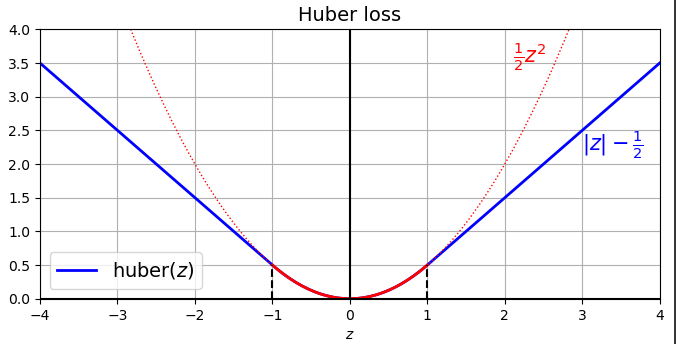 <br>

In [68]:
# Assuming huber loss is not availble in keras :
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [70]:
# Use the custom huber_fn in the compile method
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [71]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 5s 7ms/step - loss: 0.4827 - mae: 0.8318 - val_loss: 0.3478 - val_mae: 0.6525
Epoch 2/2
363/363 [==============================] - 2s 5ms/step - loss: 0.2411 - mae: 0.5412 - val_loss: 0.2641 - val_mae: 0.5484
